In [ ]:
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
import statistics
import numpy as np
import gc
from types import FunctionType
from tests import *
import matplotlib.patches

gc.disable()
def benchmark(test: FunctionType) -> float:
    start: float = time.perf_counter()
    res = test()
    end = time.perf_counter() - start
    clear_output()
    del res
    gc.collect()
    gc.collect() # run twice to make sure all memory is cleaned
    return end

In [6]:
sequential_select_times = [benchmark(sequential_select_test) for _ in range(100)]
with open("sequential_select.txt", "w") as file:
    for i in range(len(sequential_select_times) // 4):
        file.write(f"{sequential_select_times[i]}, {sequential_select_times[i + 1]}, {sequential_select_times[i + 2]}, {sequential_select_times[i + 3]},\n")

In [5]:
sequential_complex_query_times = [benchmark(sequential_complex_query_test) for _ in range(100)]
with open("sequential_complex_query.txt", "w") as file:
    for i in range(len(sequential_complex_query_times) // 4):
        file.write(f"{sequential_complex_query_times[i]}, {sequential_complex_query_times[i + 1]}, {sequential_complex_query_times[i + 2]}, {sequential_complex_query_times[i + 3]},\n")

In [7]:
multithread_select_times = [benchmark(multithread_select_test) for _ in range(100)]
with open("multithread_select.txt", "w") as file:
    for i in range(len(multithread_select_times) // 4):
        file.write(f"{multithread_select_times[i]}, {multithread_select_times[i + 1]}, {multithread_select_times[i + 2]}, {multithread_select_times[i + 3]},\n")

In [12]:
multithread_complex_query_times = [benchmark(multithread_complex_query_test) for _ in range(100)]
with open("multithread_complex_query.txt", "w") as file:
    for i in range(len(multithread_complex_query_times) // 4):
        file.write(f"{multithread_complex_query_times[i]}, {multithread_complex_query_times[i + 1]}, {multithread_complex_query_times[i + 2]}, {multithread_complex_query_times[i + 3]},\n")

In [ ]:
multiprocess_select_times = [benchmark(multiprocess_select_test) for _ in range(100)]
with open("multiprocess_select.txt", "w") as file:
    for i in range(len(multiprocess_select_times) // 4):
        file.write(f"{multiprocess_select_times[i]}, {multiprocess_select_times[i + 1]}, {multiprocess_select_times[i + 2]}, {multiprocess_select_times[i + 3]},\n")

In [11]:
multiprocess_complex_query_times = [benchmark(multiprocess_complex_query_test) for _ in range(100)]
with open("multiprocess_complex_query.txt", "w") as file:
    for i in range(len(multiprocess_complex_query_times) // 4):
        file.write(f"{multiprocess_complex_query_times[i]}, {multiprocess_complex_query_times[i + 1]}, {multiprocess_complex_query_times[i + 2]}, {multiprocess_complex_query_times[i + 3]},\n")

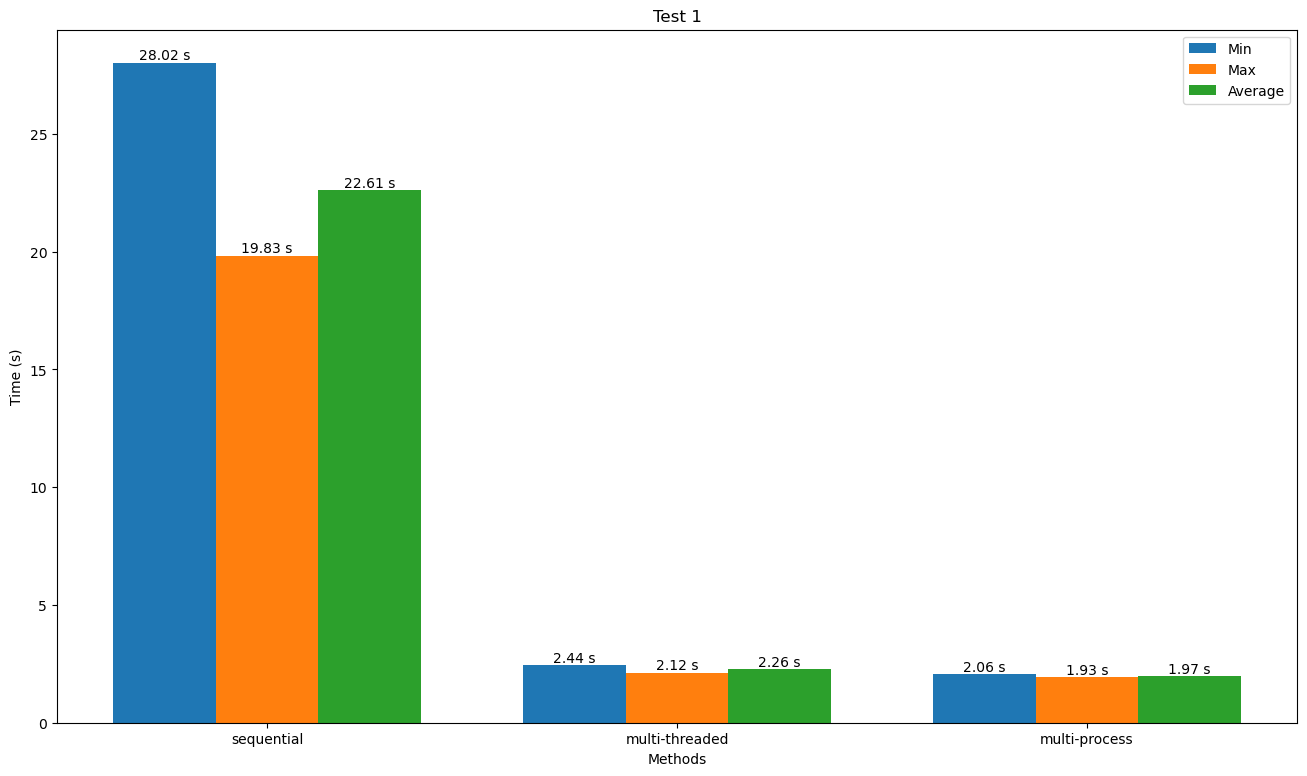

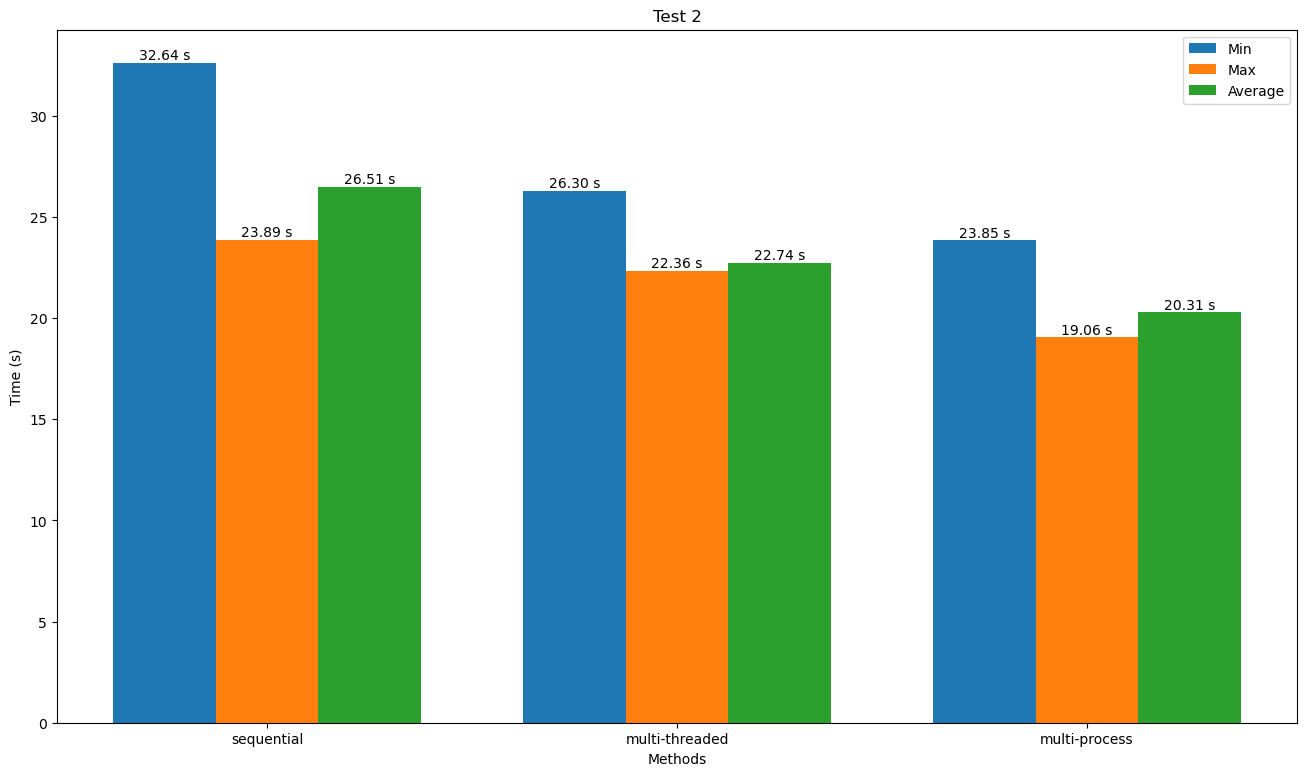

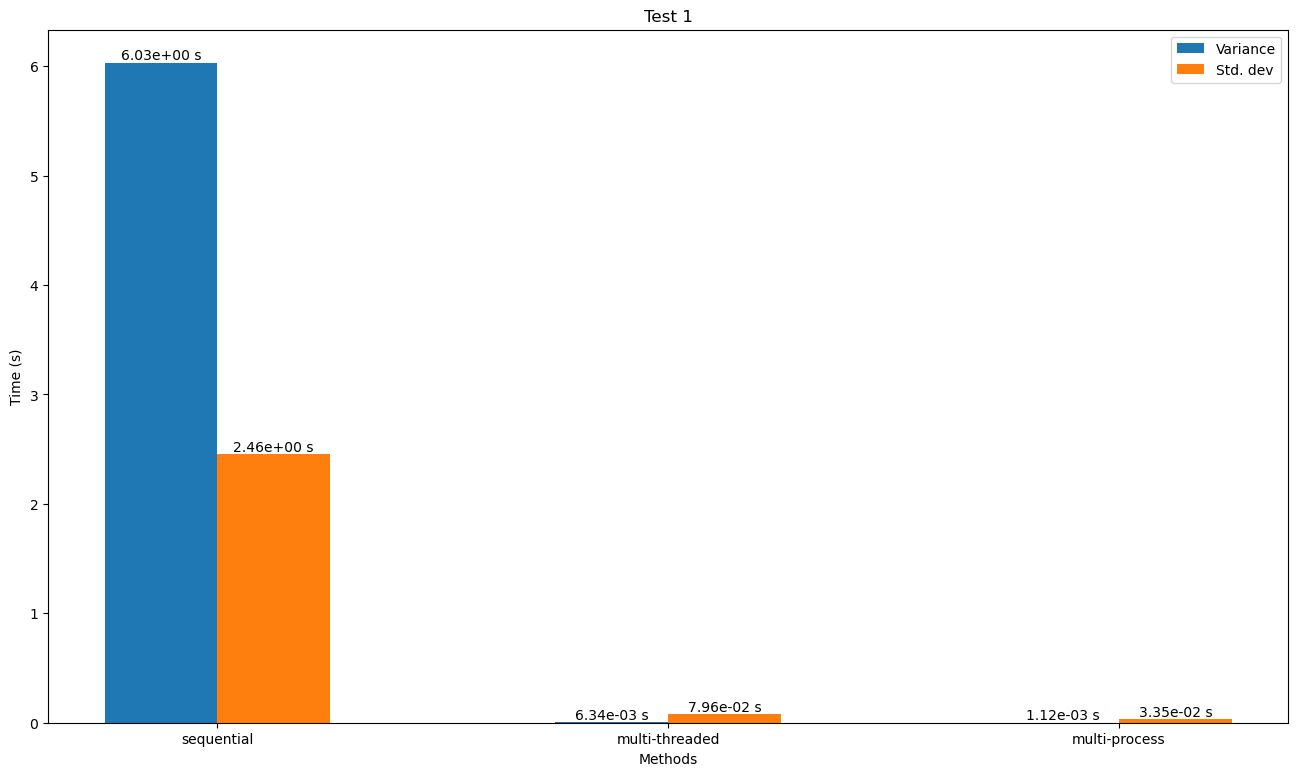

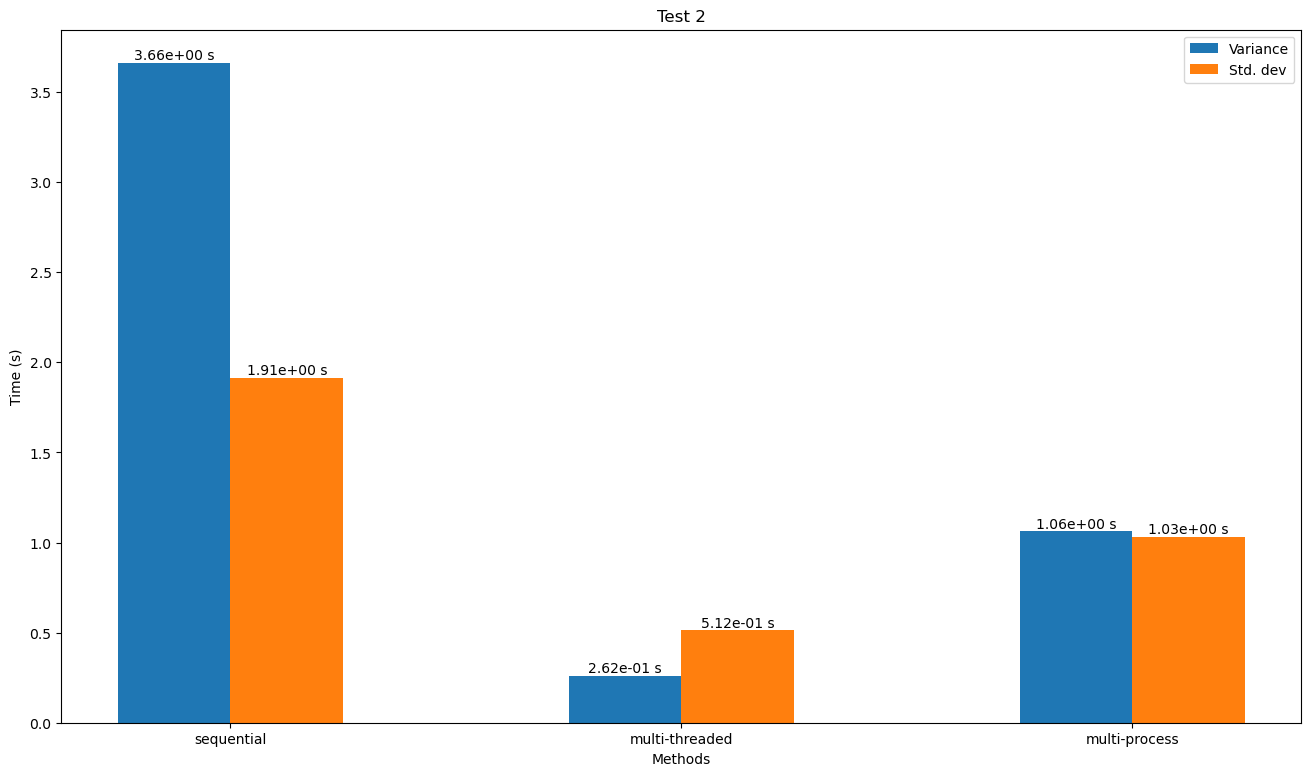

In [ ]:
gc.enable()

max_stats_select = [ 
    max(sequential_select_times),
    max(multithread_select_times),
    max(multiprocess_select_times)
]

min_stats_select = [ 
    min(sequential_select_times),
    min(multithread_select_times),
    min(multiprocess_select_times)
]

mean_stats_select = [ 
    statistics.mean(sequential_select_times),
    statistics.mean(multithread_select_times),
    statistics.mean(multiprocess_select_times)
]

variance_stats_select = [ 
    statistics.variance(sequential_select_times),
    statistics.variance(multithread_select_times),
    statistics.variance(multiprocess_select_times)
]

stddev_stats_select = [ 
    statistics.stdev(sequential_select_times),
    statistics.stdev(multithread_select_times),
    statistics.stdev(multiprocess_select_times)
]

max_stats_complex_query = [ 
    max(sequential_complex_query_times),
    max(multithread_complex_query_times),
    max(multiprocess_complex_query_times)
]

min_stats_complex_query = [ 
    min(sequential_complex_query_times),
    min(multithread_complex_query_times),
    min(multiprocess_complex_query_times)
]

mean_stats_complex_query = [ 
    statistics.mean(sequential_complex_query_times),
    statistics.mean(multithread_complex_query_times),
    statistics.mean(multiprocess_complex_query_times)
]

variance_stats_complex_query = [ 
    statistics.variance(sequential_complex_query_times),
    statistics.variance(multithread_complex_query_times),
    statistics.variance(multiprocess_complex_query_times)
]

stddev_stats_complex_query = [ 
    statistics.stdev(sequential_complex_query_times),
    statistics.stdev(multithread_complex_query_times),
    statistics.stdev(multiprocess_complex_query_times)
]

labels = ['sequential', 'multi-threaded', 'multi-process']
select_stats = [max_stats_select, min_stats_select, mean_stats_select]
complex_query_stats = [max_stats_complex_query, min_stats_complex_query, mean_stats_complex_query]
select_variations = [variance_stats_select, stddev_stats_select]
complex_query_variations = [variance_stats_complex_query, stddev_stats_complex_query] 

x = np.arange(len(labels))
width = 0.25

fig1, ax1 = plt.subplots()
fig1.set_size_inches(16, 9)
min_bars = ax1.bar(x - width, select_stats[0], width, label='Min')
max_bars = ax1.bar(x, select_stats[1], width, label='Max')
avg_bars = ax1.bar(x + width, select_stats[2], width, label='Average')

bar: matplotlib.patches.Rectangle
for bar in min_bars:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f} s", ha="center", va="bottom")

for bar in max_bars:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f} s", ha="center", va="bottom")

for bar in avg_bars:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f} s", ha="center", va="bottom")

ax1.set_xlabel('Methods')
ax1.set_title("Test 1")
ax1.set_ylabel('Time (s)')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

fig2, ax2 = plt.subplots()
fig2.set_size_inches(16, 9)
min_bars = ax2.bar(x - width, complex_query_stats[0], width, label='Min')
max_bars = ax2.bar(x, complex_query_stats[1], width, label='Max')
avg_bars = ax2.bar(x + width, complex_query_stats[2], width, label='Average')

bar: matplotlib.patches.Rectangle
for bar in min_bars:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f} s", ha="center", va="bottom")

for bar in max_bars:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f} s", ha="center", va="bottom")

for bar in avg_bars:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f} s", ha="center", va="bottom")

ax2.set_xlabel('Methods')
ax2.set_title("Test 2")
ax2.set_ylabel('Time (s)')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

fig3, ax3 = plt.subplots()
fig3.set_size_inches(16, 9)
variance_bars = ax3.bar(x - width / 2, select_variations[0], width, label='Variance')
stddev_bars = ax3.bar(x + width /2, select_variations[1], width, label='Std. dev')

bar: matplotlib.patches.Rectangle
for bar in variance_bars:
    ax3.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2e} s", ha="center", va="bottom")

for bar in stddev_bars:
    ax3.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2e} s", ha="center", va="bottom")


ax3.set_xlabel('Methods')
ax3.set_title("Test 1")
ax3.set_ylabel('Time (s)')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.legend()

fig4, ax4 = plt.subplots()
fig4.set_size_inches(16, 9)
variance_bars = ax4.bar(x - width / 2, complex_query_variations[0], width, label='Variance')
stddev_bars = ax4.bar(x + width / 2, complex_query_variations[1], width, label='Std. dev')

bar: matplotlib.patches.Rectangle
for bar in variance_bars:
    ax4.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2e} s", ha="center", va="bottom")

for bar in stddev_bars:
    ax4.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2e} s", ha="center", va="bottom")


ax4.set_xlabel('Methods')
ax4.set_title("Test 2")
ax4.set_ylabel('Time (s)')
ax4.set_xticks(x)
ax4.set_xticklabels(labels)
ax4.legend()


In [ ]:
fig1.savefig("test_1_min_max_mean.png")
fig2.savefig("test_2_min_max_mean.png")
fig3.savefig("test_1_variance_stddev.png")
fig4.savefig("test_2_variance_stddev.png")